In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.optimize as op
plt.rcParams['font.sans-serif']=['SimHei']

In [49]:
all_data=pd.read_excel("SpeedVideoDataforModeling.xlsx")

In [3]:
data.columns

Index(['ID', '初始缓冲峰值速率(kbps)', 'E2E RTT(ms)', '播放阶段平均速率(kbps)', '初始缓冲时延(ms)',
       '卡顿占比', 'VMOS', '视频全程感知速率(kbps)', '卡顿时长(ms)', '播放时长(ms)', '播放阶段总时长(ms)',
       '卡顿次数', '视频码率(kbps)', '初始缓冲下载数据量(byte)', '视频质量得分SQuality',
       '初始缓冲得分SLoading', '卡顿得分Sstalling'],
      dtype='object')

In [130]:
data = all_data[all_data.iloc[:,11]==0]#选出非卡顿数据

In [138]:
#数据清洗，统一单位
MSS=1460*8/1000 #kb or 536
RTT=data['E2E RTT(ms)']
v_max=data['初始缓冲峰值速率(kbps)']
D_0=data['初始缓冲下载数据量(byte)']*8/1000
D_0.name='初始缓冲下载数据量(kb)'
tau=data['初始缓冲时延(ms)']

In [194]:
def tau_model(tup,n):
    D_0,v_max,RTT,MSS=tup
    Ds=2*(RTT/1000*v_max-MSS)
    s=np.log2((RTT/1000)*v_max/MSS)
    return (D_0-Ds)/(0.75*v_max)*1000+(n+s)*RTT #ms

In [145]:
#n, cov=op.curve_fit(mu_model,(D_0,Ds,v_max,RTT),mu)#fit

In [146]:
# 考虑到 n 取值范围为 1-9 整数
tau_expect=tau_model((D_0,v_max,RTT,MSS),9)
tau_expect.name='预期缓冲时延(ms)'

In [152]:
tau_compare=pd.DataFrame([tau_expect,tau]).transpose()
tau_compare[0:30]

,预期缓冲时延(ms),初始缓冲时延(ms)
0,1120.858182,1108.0
1,1064.648133,1095.0
2,996.492266,1051.0
3,1081.723653,1099.0
4,1074.084055,1133.0
5,1084.253964,1132.0
6,1077.769879,1020.0
7,1100.837574,1029.0
8,1148.517482,1133.0
9,1007.654138,973.0


In [148]:
tau_compare.corr()

,预期缓冲时延(ms),初始缓冲时延(ms)
预期缓冲时延(ms),1.000000,0.878418
初始缓冲时延(ms),0.878418,1.000000


In [32]:
import matplotlib.patches as mpatches

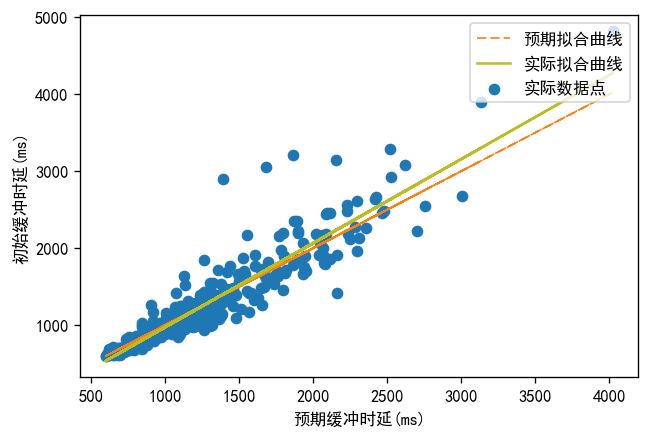

In [149]:
_sample=tau_compare.sample(400)
x=_sample.iloc[:,0]
y=_sample.iloc[:,1]
plt.clf()
_g1=plt.figure()
plt.scatter(x,y,color='tab:blue',label='实际数据点')
plt.plot(x,x,color='tab:orange',linewidth=1,linestyle='--',label='预期拟合曲线')
plt.plot(x,np.polyval(np.polyfit(x,y,1),x),color='tab:olive',linewidth=1.5,label='实际拟合曲线')
plt.xlabel('预期缓冲时延(ms)')
plt.ylabel('初始缓冲时延(ms)')
plt.legend(loc='upper right')
_g1.dpi=120
plt.show()

In [41]:
data.columns

Index(['ID', '初始缓冲峰值速率(kbps)', 'E2E RTT(ms)', '播放阶段平均速率(kbps)', '初始缓冲时延(ms)',
       '卡顿占比', 'VMOS', '视频全程感知速率(kbps)', '卡顿时长(ms)', '播放时长(ms)', '播放阶段总时长(ms)',
       '卡顿次数', '视频码率(kbps)', '初始缓冲下载数据量(byte)', '视频质量得分SQuality',
       '初始缓冲得分SLoading', '卡顿得分Sstalling'],
      dtype='object')

In [192]:
data = all_data[all_data.iloc[:,11]!=0]#选出卡顿数据

In [154]:
MSS=1460*8#bits
RTT=data['E2E RTT(ms)']
t_total=data['播放阶段总时长(ms)']
t_p=data[ '播放时长(ms)']
t_s=data['卡顿时长(ms)']
v_=data['播放阶段平均速率(kbps)']
v_max=data['初始缓冲峰值速率(kbps)']
eta=data['卡顿占比']
m=data['卡顿次数']
mu=data['视频码率(kbps)']

In [155]:
def t_s_model(m,mu,v_):
    Dr=(m*2.7*mu)
    return 1000*Dr/v_

In [157]:
t_s_expect=t_s_model(m,mu,v_)
t_s_expect.name='预期卡顿时间(ms)'

In [186]:
t_s_compare=pd.DataFrame(data=[t_s_expect,t_s]).T
t_s_compare.head()

,预期卡顿时间(ms),卡顿时长(ms)
138,23853.012781,17265.0
206,1370.328542,725.0
249,1154.019435,4354.0
262,5102.608696,6901.0
501,1251.692750,858.0


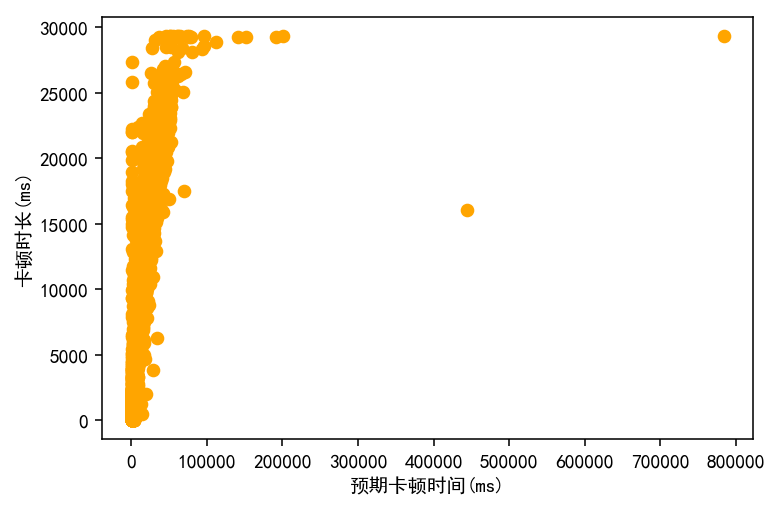

In [187]:
%matplotlib inline  
x=t_s_compare.iloc[:,0]
y=t_s_compare.iloc[:,1]
plt.clf()
g2=plt.figure()
plt.scatter(x,y,color='orange')
plt.xlabel(x.name)
plt.ylabel(y.name)
g2.dpi=140

由上图可以看到，存在两个异常数据点。
出现这一结果的原因是未考虑卡顿时间最长即为视频长度30000ms。

In [188]:
t_s_compare=t_s_compare[t_s_compare.iloc[:,0]<100000]

In [189]:
t_s_compare.corr()

,预期卡顿时间(ms),卡顿时长(ms)
预期卡顿时间(ms),1.0000,0.9303
卡顿时长(ms),0.9303,1.0000


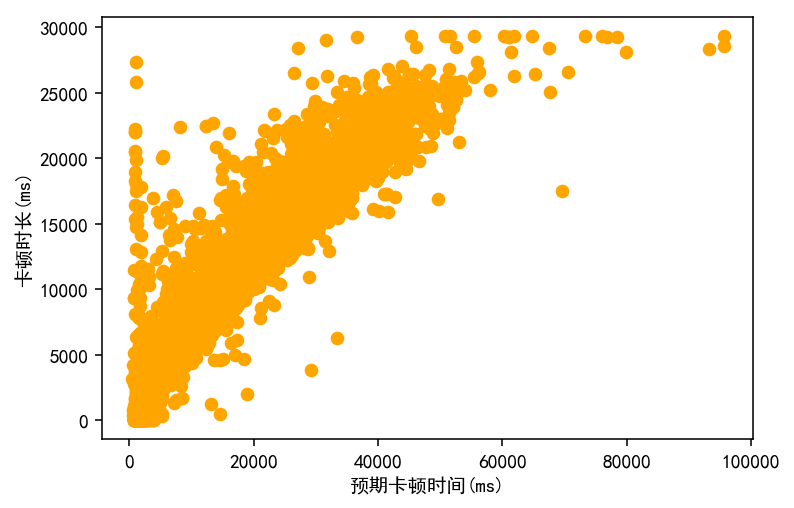

In [190]:
x=t_s_compare.iloc[:,0]
y=t_s_compare.iloc[:,1]
plt.clf()
g2=plt.figure()
plt.scatter(x,y,color='orange')
plt.xlabel(x.name)
plt.ylabel(y.name)
g2.dpi=140

In [229]:
def eval_model_(m,mu,v_,t_s,RTT,n=8):
    def t_s_model(m,mu,v_,RTT,n):
        Dr=(m*2.7*mu)
        t_r=1000*Dr/v_*0.6+RTT*n
        t_r[t_r>30000]=30000
        return t_r
    t_s_expect=t_s_model(m,mu,v_,RTT,n)
    t_s_expect.name='预期卡顿时间(ms)'
    t_s_compare=pd.DataFrame(data=[t_s_expect,t_s]).T
    t_s_compare=t_s_compare[t_s_compare.iloc[:,0]<200000]
    print(t_s_compare.head())
    print(t_s_compare.corr())
    x=t_s_compare.iloc[:,0]
    y=t_s_compare.iloc[:,1]
    plt.clf()
    g2=plt.figure()
    plt.scatter(x,y,color='orange')
    plt.plot(x,x,color='red',linewidth=1,\
             linestyle='--',label='预期拟合曲线')
    plt.plot(x,np.polyval(np.polyfit(x,y,1),x),\
             color='purple',label='实际拟合曲线')
    plt.legend(loc='upper right')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    g2.dpi=140


       预期卡顿时间(ms)  卡顿时长(ms)
138  14599.807669   17265.0
206   1406.197125     725.0
249    908.411661    4354.0
262   3813.565217    6901.0
501   1215.015650     858.0
            预期卡顿时间(ms)  卡顿时长(ms)
预期卡顿时间(ms)     1.00000   0.93901
卡顿时长(ms)       0.93901   1.00000


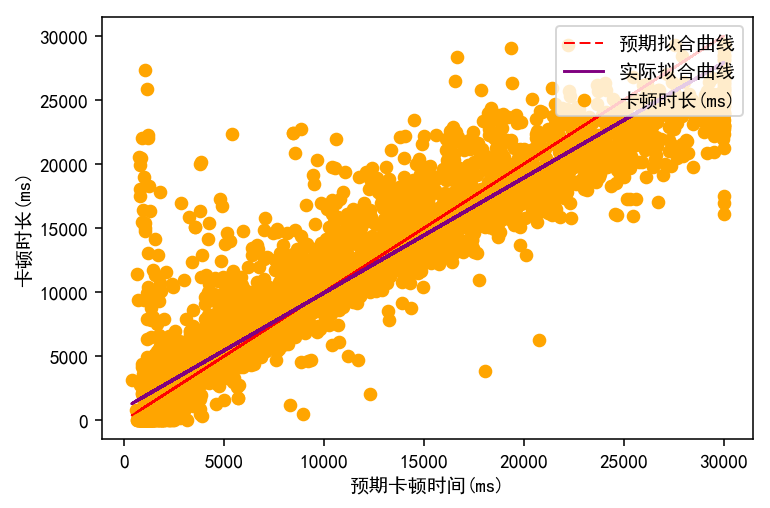

In [230]:
eval_model_(m,mu,v_,t_s,RTT)